In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os, sys

In [3]:
from utils import *
sfiles = glob('data/stopcodes_sequence/*.txt')
seg_routes = {}
for sname in sfiles:
    if 'X' in sname:
        continue
    with open(sname) as fl:
        raw = fl.read()
    lines = raw.split('\n')[:-1]
    for ii in range(1, len(lines)):
        skey = ('%s-%s' % (lines[ii-1], lines[ii]))
        if skey not in seg_routes:
            seg_routes[skey] = []
        seg_routes[skey].append(fileName(sname))

In [23]:
segkey = lambda seg: '%s-%s' % (seg[0], seg[1])

In [24]:
segids = list(seg_routes.keys())
segids = list(map(lambda k: k.split('-'), segids))
print(segids[0])

['551351', '551352']


In [26]:
def get_adj(segids):
    # undirected adjacencies
    adjlist = {}
    for si, start in enumerate(tqdm(segids)):
        for ei, end in enumerate(segids):
            if start[1] == end[0]:
                if segkey(start) not in adjlist:
                    adjlist[segkey(start)] = []
                if segkey(end) not in adjlist:
                    adjlist[segkey(end)] = []
                adjlist[segkey(start)].append((end, 1))
                adjlist[segkey(end)].append((start, -1))
    return adjlist

In [27]:
adjlist = get_adj(segids)

100%|██████████| 16923/16923 [00:26<00:00, 632.42it/s]


In [28]:
segnames = list(adjlist.keys())
counts = list(map(lambda key: len(adjlist[key]), segnames))

In [55]:
for ii in np.argsort(counts)[-200:-100]:
    if '40' in segnames[ii]:
        print(segnames[ii], len(adjlist[segnames[ii]]))
# for ii in np.argsort(counts):
#     if '400933' in segnames[ii]:
#         print(segnames[ii], len(adjlist[segnames[ii]]))

405500-402085 5
501402-501337 5
404081-404168 5
400860-400861 6
402215-450202 6
504404-552993 6
403438-101415 6
503551-804024 6
402377-402379 6
550040-550041 6
100652-104002 6
981012-400161 6
403434-403777 6
501401-501336 6
552508-403293 6
401797-403293 6
100483-404081 6
403656-403658 6
400124-400125 6
404081-450446 6
450446-400124 6
550462-504404 6
403438-103383 6
402215-402216 6


In [30]:
byseg = list(sorted(list(seg_routes.keys()), key=lambda seg: len(seg_routes[seg])))
for seg in reversed(byseg[-50:-30]):
    print(seg, len(seg_routes[seg]))

500081-505233 8
450020-450024 8
450420-402082 8
405256-450378 8
500008-500009 8
450004-403640 8
405060-405500 8
502408-552511 8
450014-450018 8
450023-450377 8
401844-450417 8
450203-405256 8
200284-905002 7
502399-552520 7
100730-100731 7
501398-501399 7
551323-551325 7
450015-450019 6
101729-101730 6
551352-553210 6


In [58]:
tag = '400860-400861'
# 400860-400861
# 400861-403781
# 400861-400948
# 400861-405376

# 400951-403797, 403797-400953, 403797-405297
print(len(seg_routes[tag]))
print(adjlist[tag])
print(sorted(seg_routes[tag]))
for adj in adjlist[tag]:
    if adj[1] == 1:
        print('%s-%s' % tuple(adj[0]))

5
[(['400861', '403781'], 1), (['400861', '400948'], 1), (['400861', '405376'], 1), (['404138', '400860'], -1), (['400858', '400860'], -1), (['401348', '400860'], -1)]
['M104_1', 'M10_1', 'M20_1', 'M5_1', 'M7_1']
400861-403781
400861-400948
400861-405376


In [11]:
list(adjlist.keys())[0]
print(adjlist[list(adjlist.keys())[0]])

[((502977, 502978), -1), ((502979, 502980), 1)]


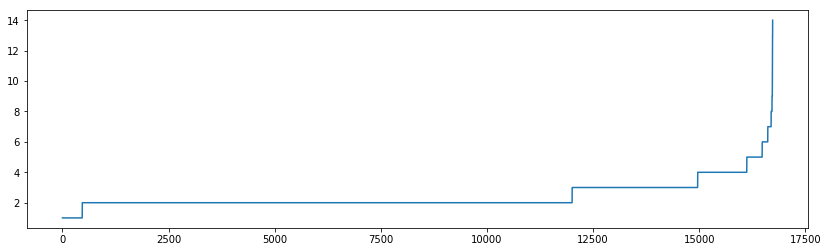

In [12]:
plt.figure(figsize=(14, 4))
plt.plot(sorted(counts))
plt.show(); plt.close()

100%|██████████| 16728/16728 [00:37<00:00, 450.85it/s]


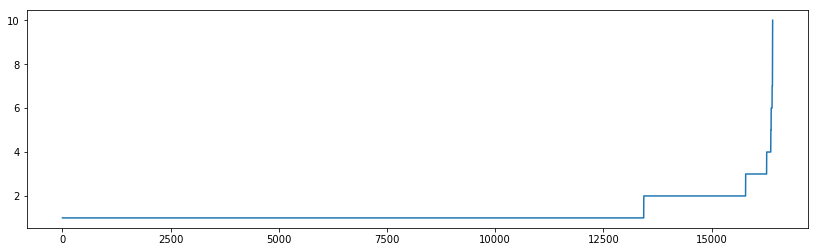

In [58]:
adjlist = get_inc(segids)
counts = map(lambda key: len(adjlist[key]), adjlist.keys())
plt.figure(figsize=(14, 4))
plt.plot(sorted(counts))
plt.show(); plt.close()

In [40]:
valid = {}
with open('Valid-Counts.txt') as fl:
    lines = fl.read().split('\n')
lines = [ln.split(',') for  ln in lines[1:-1]]
lines = [(ent[0], int(ent[1])) for ent in lines]
for segid, count in lines:
    valid[segid] = (count, count/13248)
# print(valid_counts[0], valid_counts[-1])

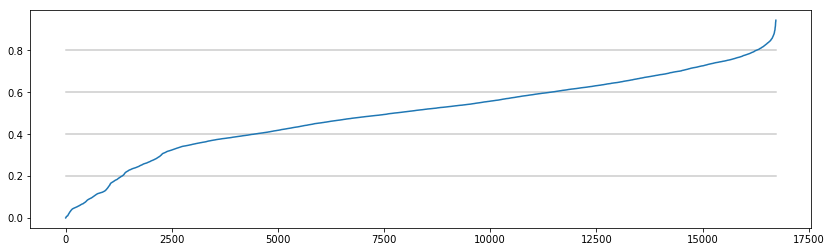

In [44]:
val_perc = list(map(lambda key: valid[key][1], valid.keys()))
plt.figure(figsize=(14, 4))
for ii in range(1, 5):
    plt.plot([0, len(val_perc)], [0.2*ii, 0.2*ii], color='#CCCCCC')
plt.plot(sorted(val_perc))
plt.show(); plt.close()

In [49]:
def cull_invalid(ids, cut=0.7):
    return list(filter(lambda one: valid[segkey(one)][1] > cut, ids))

val_ids = cull_invalid(segids)
print(len(val_ids))

2305


In [62]:
adjlist = get_adj(val_ids)   
counts = map(lambda key: len(adjlist[key]), adjlist.keys())

100%|██████████| 2305/2305 [00:00<00:00, 2479.70it/s]


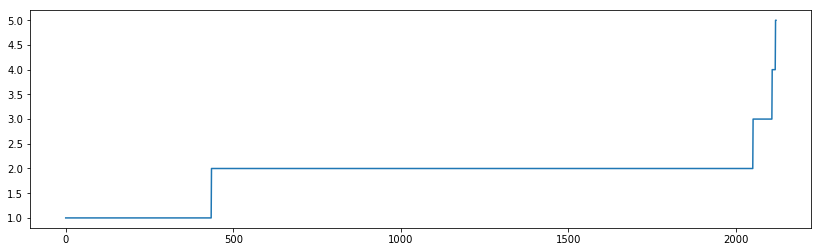

In [63]:
plt.figure(figsize=(14, 4))
plt.plot(sorted(counts))
plt.show(); plt.close()

In [66]:
routes = glob('data/stopcodes_sequence/*_0.txt')
print(routes[0])

data/stopcodes_sequence/Q22_0.txt


In [70]:
rlen = {}
for rname in routes:
    with open(rname) as fl:
        rlen[rname.split('/')[-1][:-4]] = len(fl.read().split('\n'))

In [71]:
rlen['Q22_0']

65

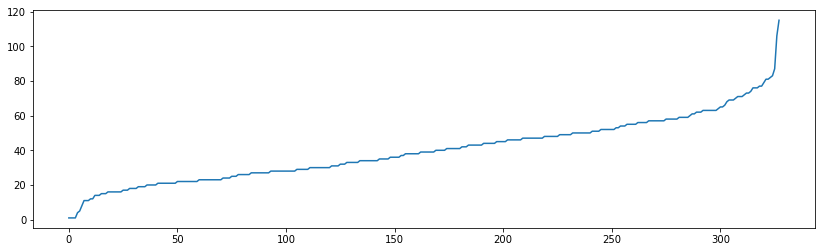

In [72]:
plt.figure(figsize=(14, 4))
plt.plot(sorted(rlen.values()))
plt.show(); plt.close()